In [1]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [4]:
selected_cell = 'Stellate cells'

In [5]:
estimation = pd.read_csv('TCGA-LIHC.Mesenchyme.csv',index_col=0)
estimation.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE
Mixture,,,,,,,,,,
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415
TCGA-G3-A3CH-11,0.305872,0.525305,0.017091,0.026283,0.069102,0.006428,0.049920,0,0.972299,0.490151
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281


In [6]:
sample_list = [sample for sample in estimation.index.values if '-01' in sample]
estimation = estimation.reindex(sample_list)

In [7]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S,0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724.0,1.0,724.0,1.0,102.0,1,102.0,NaN
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624.0,1.0,1624.0,1.0,1083.0,1,1083.0,NaN
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939.0,0.0,1939.0,0.0,1939.0,0,1939.0,NaN
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532.0,1.0,2532.0,0.0,2532.0,1,1745.0,NaN


In [8]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

,DFI.time,DFI,DFS_E,DFS_T
sample,,,,
TCGA-2Y-A9GS-01,102.0,1.0,True,3.400000
TCGA-2Y-A9GT-01,1083.0,1.0,True,36.100000
TCGA-2Y-A9GU-01,1939.0,0.0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,0.0,False,84.400000
TCGA-2Y-A9GW-01,1229.0,1.0,True,40.966667


In [9]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415,1.0,0.0,False,0.033333
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547,315.0,0.0,False,10.500000
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964,8.0,0.0,False,0.266667
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281,2398.0,0.0,False,79.933333
TCGA-BD-A3EP-01,0.596204,0.121961,0.028220,0.035394,0.057758,0.117437,0.043027,0,0.585677,0.838098,409.0,0.0,False,13.633333


In [10]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-5R-AA1D-01,0.410883,0.098648,0.012759,0.067650,0.191235,0.145075,0.073749,0,0.497077,0.889827,449.0,0.0,False,14.966667
TCGA-DD-AADI-01,0.568040,0.101020,0.054414,0.005591,0.173379,0.025517,0.072039,0,0.612231,0.843019,1085.0,0.0,False,36.166667
TCGA-CC-A9FV-01,0.554518,0.000000,0.017659,0.076945,0.164886,0.084080,0.101913,0,0.442071,0.956760,0.0,0.0,False,0.000000
TCGA-DD-A4NB-01,0.330320,0.125399,0.014468,0.051715,0.161959,0.256257,0.059883,0,0.559472,0.852299,912.0,1.0,True,30.400000
TCGA-DD-AACN-01,0.499247,0.153982,0.023663,0.067351,0.157081,0.032970,0.065706,0,0.623221,0.801846,357.0,1.0,True,11.900000


In [11]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [12]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

44

In [13]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.0640134188902121

In [14]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.00126

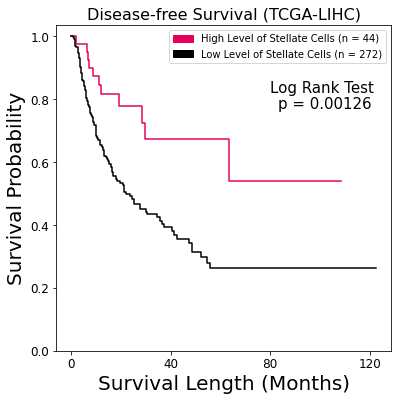

In [15]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of Stellate Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Stellate Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [16]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

,OS.time,OS,OS_E,OS_T
sample,,,,
TCGA-2Y-A9GS-01,724.0,1,True,24.133333
TCGA-2Y-A9GT-01,1624.0,1,True,54.133333
TCGA-2Y-A9GU-01,1939.0,0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,1,True,84.400000
TCGA-2Y-A9GW-01,1271.0,1,True,42.366667


In [17]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415,1.0,0,False,0.033333
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547,315.0,1,True,10.500000
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964,8.0,0,False,0.266667
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281,2398.0,0,False,79.933333
TCGA-CC-A1HT-01,0.602426,0.000000,0.127597,0.014010,0.029641,0.192867,0.033458,0,0.701488,0.921574,101.0,1,True,3.366667


In [18]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-5R-AA1D-01,0.410883,0.098648,0.012759,0.067650,0.191235,0.145075,0.073749,0,0.497077,0.889827,449.0,0,False,14.966667
TCGA-DD-AAD1-01,0.436778,0.145720,0.029112,0.029722,0.173745,0.124834,0.060088,0,0.839324,0.686558,564.0,0,False,18.800000
TCGA-DD-AADI-01,0.568040,0.101020,0.054414,0.005591,0.173379,0.025517,0.072039,0,0.612231,0.843019,1085.0,0,False,36.166667
TCGA-CC-A9FV-01,0.554518,0.000000,0.017659,0.076945,0.164886,0.084080,0.101913,0,0.442071,0.956760,0.0,0,False,0.000000
TCGA-DD-A4NB-01,0.330320,0.125399,0.014468,0.051715,0.161959,0.256257,0.059883,0,0.559472,0.852299,989.0,0,False,32.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DD-AACA-01,0.676929,0.131671,0.029751,0.044030,0.000000,0.027973,0.089647,0,0.894890,0.663799,2301.0,0,False,76.700000
TCGA-BC-A5W4-01,0.546586,0.285709,0.040594,0.031600,0.000000,0.019160,0.076352,0,0.825432,0.566396,547.0,1,True,18.233333
TCGA-CC-A3MA-01,0.266766,0.030257,0.093116,0.012987,0.000000,0.398387,0.198487,0,0.696050,0.912079,303.0,1,True,10.100000
TCGA-UB-A7MB-01,0.357475,0.381280,0.125973,0.030761,0.000000,0.003170,0.101341,0,0.913002,0.426124,601.0,0,False,20.033333


In [25]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [26]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

73

In [27]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

0.0546991134981494

In [28]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.01424

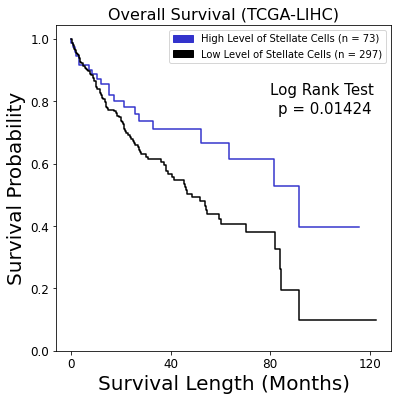

In [29]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of Stellate Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Stellate Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.76, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')

In [30]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

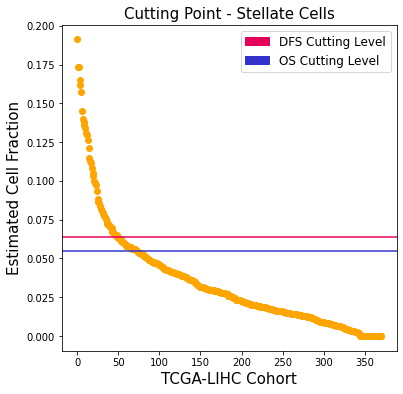

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.xlabel('TCGA-LIHC Cohort',fontsize=15)
plt.title('Cutting Point - Stellate Cells',fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
#plt.yscale("log")
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')